In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


In [3]:
def PlotOrder(df, sXColor = ((0.7, 'black'), (0.6, 'gray'),), logy=True, ylim=[]):
    fig, ax = plt.subplots()
    ax.set_title(r'Residual error for $\sum_{j}^{122} x^j$')
    ax.set_xlabel('Order')
    ax.set_ylabel('Residual Error')
    if ylim:
        ax.set_ylim(ylim)
    if logy:
        ax.set_yscale('log')
    ax.grid(True)
        
    ax2 = ax.twinx()
    ax2.set_ylabel('Uncertainty')
    
    for x, color in sXColor:
        dfPlot = df[df['x'] == x]  
        ax.plot(dfPlot['Order'], np.abs(dfPlot['Value Diff']), c=color, ls='-', label=f'{x} Residual Error')
        ax.plot(dfPlot['Order'], dfPlot['Poly Uncertainty'], c=color, ls='--', label=f'{x} Poly Uncertainty')
        ax2.plot(dfPlot['Order'], dfPlot['Poly LSV'], c=color, ls=':', label=f'{x} Poly LSV')
        ax2.plot(dfPlot['Order'], dfPlot['Poly Uncertainty'], c=color, ls='-.', label=f'{x} Poly Uncertainty')
    
    ax.legend(bbox_to_anchor=(1.5, 1.0))
    ax2.legend(bbox_to_anchor=(1.5, 0.2))


In [4]:
df = pd.read_csv("../Python/Output/PolyOne_order.txt", sep='\t')
df.head()

,x,Order,Poly Value,Poly Uncertainty,Value Diff,Poly LSV
0,-0.7,2,0.30000,7.166415e-17,-0.288235,5.551115e-17
1,-0.7,3,0.79000,6.903640e-17,0.201765,1.110223e-16
2,-0.7,4,0.44700,7.570392e-17,-0.141235,5.551115e-17
3,-0.7,5,0.68710,6.695797e-17,0.098865,1.110223e-16
4,-0.7,6,0.51903,8.617147e-17,-0.069205,1.110223e-16


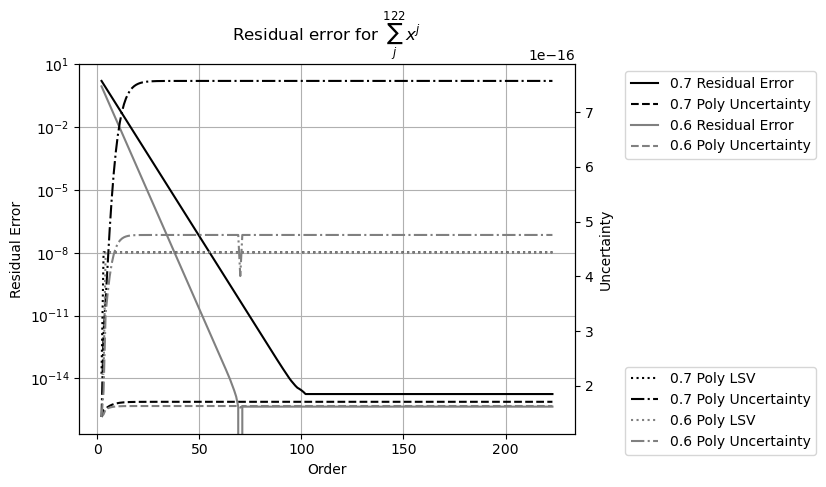

In [5]:
PlotOrder(df)

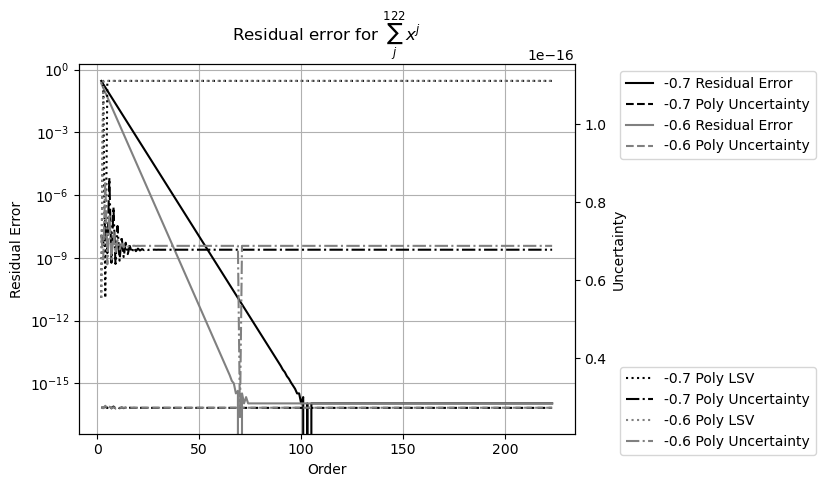

In [6]:
PlotOrder(df, sXColor = ((-0.7, 'black'), (-0.6, 'gray'),))

In [7]:
def PlotX(df, xlim=[], ylim=[], logy=False):
    fig, ax = plt.subplots()
    ax.set_title(r'Residual error: $\sum_{j=1}^{224} x^j - \frac{1}{1 - x}$')
    ax.set_xlabel('Input x')
    ax.set_ylabel('Residual error')
    if xlim:
        dfPlot = df[(df['x'] >= xlim[0]) & (df['x'] <= xlim[1])]
    else:
        dfPlot = df
    if ylim:
        ax.set_ylim(ylim)
    if logy:
        ax.set_yscale('log')
    ax.grid(True)
    
    if logy:
        ax.plot(dfPlot['x'], np.abs(dfPlot['Value Diff']), 'k-', label=f'Residual Error')
        ax.plot(dfPlot['x'], dfPlot['Inverse Uncertainty'], color='gray', ls='-', label=f'Inverse Uncertainty')
        ax.plot(dfPlot['x'], dfPlot['Poly Uncertainty'], 'k:', label=f'Poly Uncertainty')
    else:
        ax.plot(dfPlot['x'], dfPlot['Value Diff'], 'k-', label=f'Residual Error')
        ax.plot(dfPlot['x'], dfPlot['Inverse Uncertainty'], color='gray', ls='-', label=f'Inverse Uncertainty')
        ax.plot(dfPlot['x'], dfPlot['Poly Uncertainty'], 'k:', label=f'Poly Uncertainty')
        ax.plot(dfPlot['x'], -dfPlot['Inverse Uncertainty'], color='gray', ls='-')
        ax.plot(dfPlot['x'], -dfPlot['Poly Uncertainty'], 'k:')
        
    ax.legend(bbox_to_anchor=(1.5, 1.0))

    if 'Order' in df:
        ax2 = ax.twinx()
        ax2.set_ylabel('Required Expansion Order')
        if logy:
            ax2.set_yscale('log')
        ax2.plot(dfPlot['x'], dfPlot['Order'], color='gray', ls='--', label=f'Required Expansion Order')
        ax2.legend(bbox_to_anchor=(1.5, 0.15))    

In [8]:
df = pd.read_csv("../Python/Output/PolyOne_x.txt", sep='\t')
df.head()

,x,Inverse Value,Inverse Uncertainty,Poly Value,Poly Uncertainty,Value Diff,Value LSV,LSV Diff,Order
0,-0.99,0.502513,6.611080e-17,0.449616,7.823054e-16,-0.052897,1.110223e-16,-4.764532e+14,3656
1,-0.98,0.505051,6.615112e-17,0.499581,1.015044e-16,-0.005470,1.110223e-16,-4.926807e+13,1819
2,-0.97,0.507614,6.619245e-17,0.507062,6.868512e-17,-0.000553,1.110223e-16,-4.977279e+12,1207
3,-0.96,0.510204,6.623481e-17,0.510150,6.644441e-17,-0.000055,1.110223e-16,-4.910095e+11,900
4,-0.95,0.512821,6.627824e-17,0.512815,6.629841e-17,-0.000005,1.110223e-16,-4.727622e+10,717


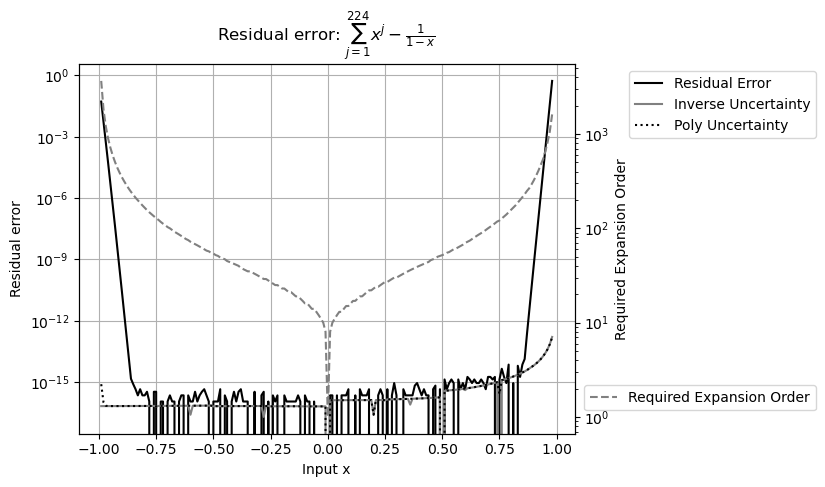

In [9]:
PlotX(df, logy=True)

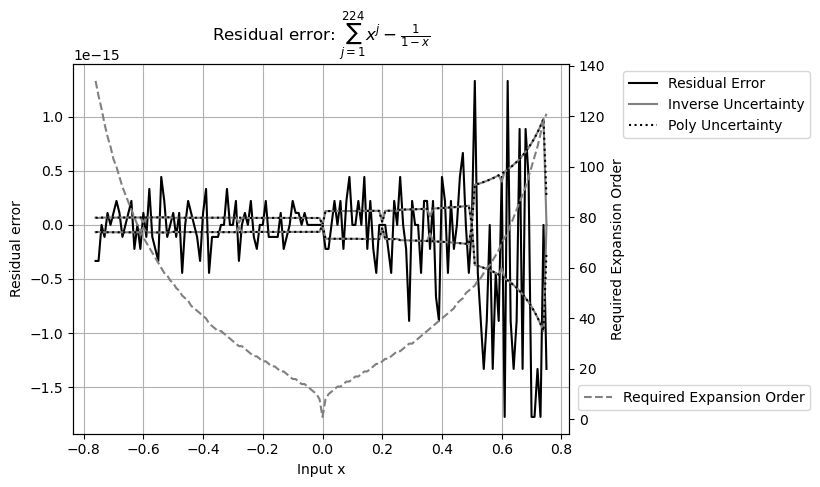

In [10]:
PlotX(df, xlim=(-0.76,0.75))

In [14]:
df['Normalized Error'] = df['Value Diff'] / df['Poly Uncertainty']
df[(df['Order'] < 224)]['Normalized Error'].std()

2.604224270332885

In [33]:
df = pd.read_csv("../Python/Output/PolyOne_x_0.05.txt", sep='\t')
df.head()

,x,Inverse Value,Inverse Uncertainty,Poly Value,Poly Uncertainty,Value Diff
0,-0.75,0.571896,0.016380,0.571896,0.016381,-1.159450e-07
1,-0.74,0.575188,0.016569,0.575188,0.016570,-1.205774e-08
2,-0.73,0.578519,0.016762,0.578519,0.016762,-1.225565e-09
3,-0.72,0.581888,0.016958,0.581888,0.016958,-1.216912e-10
4,-0.71,0.585297,0.017158,0.585297,0.017158,-1.179790e-11


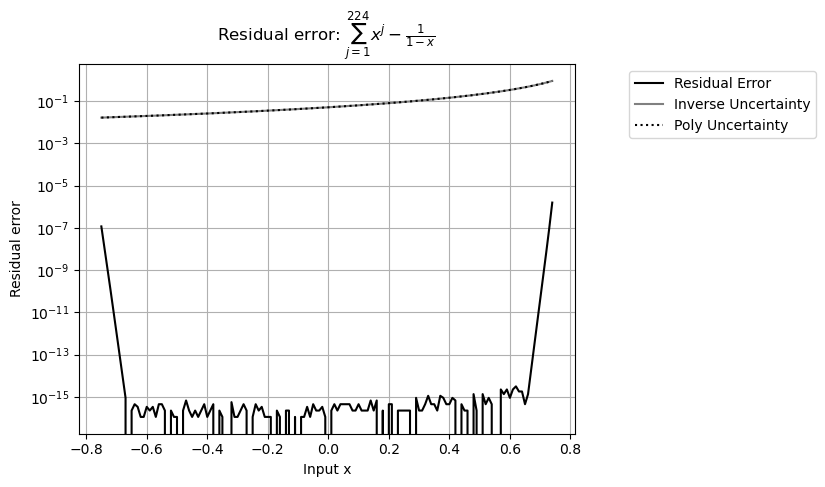

In [34]:
PlotX(df, logy=True)